In [2]:
from evaluation import evaluate_dream_interpretations
import pandas as pd
dreams_interpretations_df = pd.read_csv('datasets/Mistral-7B-Instruct-v0.2_25.04.17-16.csv')
dreams_interpretations_df = evaluate_dream_interpretations(dreams_interpretations_df)
dreams_interpretations_df.to_csv('datasets/Mistral-7B-Instruct-v0.2_25.04.17-16_evaluated.csv', index=False)
dreams_interpretations_df

,Unnamed: 0,prompt,symbols,dream,interpretation,BLEU,perplexity,ROUGE,BERT
0,0,"Given dream description, interpret the meaning...",- Mammoth: To see a mammoth in your dream im...,I see a man sitting on the tail of a giant fis...,The man in the dream represents the dreamer hi...,0.088742,916.497447,0.450450,0.733904
1,1,"Given dream description, interpret the meaning...",- Deja Vu: To dream of Déjà Vu indicates som...,I had two dreams about Michael. Both times he ...,The dream about Michael can be interpreted as ...,0.077078,245.583295,0.353741,0.810752
2,2,"Given dream description, interpret the meaning...",- Accident: To dream that you are in an acci...,"I got up during the night for some reason, and...",The dream is about your relationship with your...,0.033206,244.331305,0.316547,0.622457
3,3,"Given dream description, interpret the meaning...",- Earplugs: To dream that you are wearing or...,Am aboard bus in a strange city and don't know...,"The dreamer is in a strange city, which could ...",0.064408,164.495097,0.423841,0.545727
4,4,"Given dream description, interpret the meaning...",- Ocean: To see an ocean in your dream repre...,This girl was underwater. Some guy got her (th...,The dreamer is experiencing emotional turmoil ...,0.027071,199.325716,0.295775,0.480647


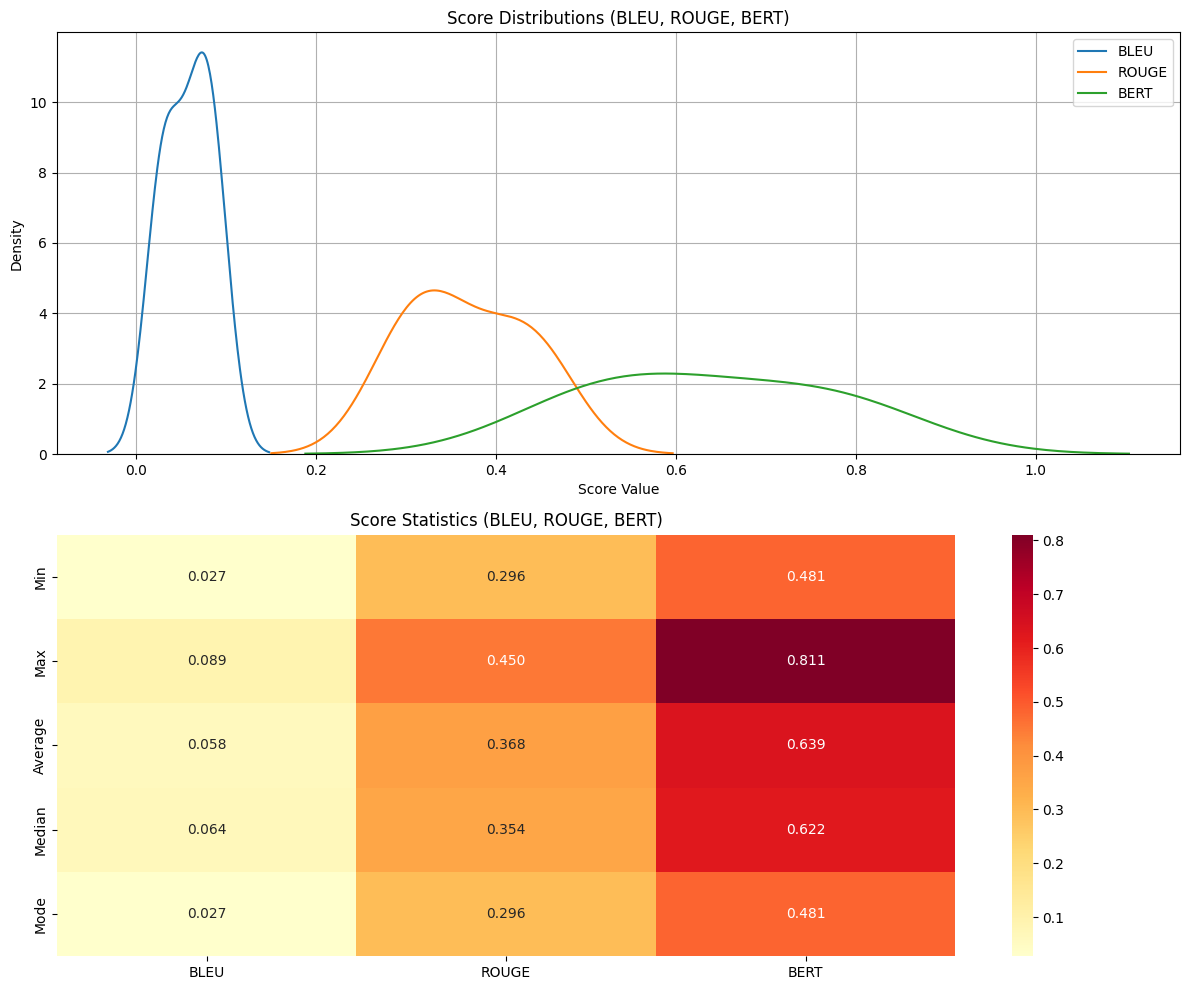

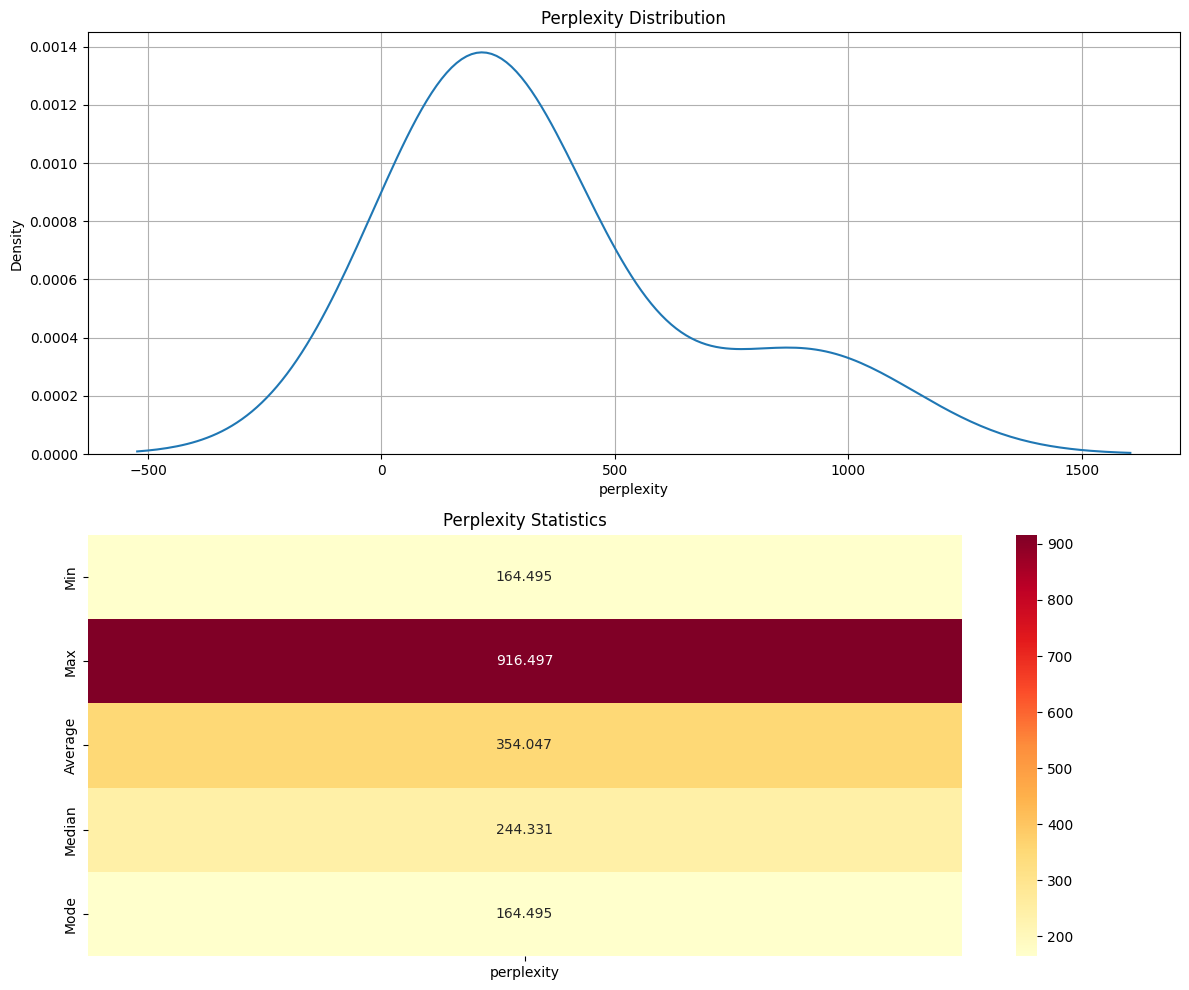

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Create figure with subplots for non-perplexity scores
fig1, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Plot distributions without perplexity
scores_without_perplexity = ['BLEU', 'ROUGE', 'BERT']
for score in scores_without_perplexity:
    sns.kdeplot(data=dreams_interpretations_df[score], label=score, ax=ax1)
ax1.set_title('Score Distributions (BLEU, ROUGE, BERT)')
ax1.legend()

# Calculate statistics for heatmap without perplexity
stats_df = pd.DataFrame()
for score in scores_without_perplexity:
    stats_df[score] = [
        dreams_interpretations_df[score].min(),
        dreams_interpretations_df[score].max(),
        dreams_interpretations_df[score].mean(),
        dreams_interpretations_df[score].median(),
        stats.mode(dreams_interpretations_df[score])[0]
    ]
stats_df.index = ['Min', 'Max', 'Average', 'Median', 'Mode']

# Plot heatmap
sns.heatmap(stats_df, annot=True, fmt='.3f', cmap='YlOrRd', ax=ax2)
ax2.set_title('Score Statistics (BLEU, ROUGE, BERT)')
plt.tight_layout()

# Create separate figure for perplexity
fig2, (ax3, ax4) = plt.subplots(2, 1, figsize=(12, 10))

# Plot perplexity distribution
sns.kdeplot(data=dreams_interpretations_df['perplexity'], ax=ax3)
ax3.set_title('Perplexity Distribution')

# Calculate perplexity statistics
perplexity_stats = pd.DataFrame({
    'perplexity': [
        dreams_interpretations_df['perplexity'].min(),
        dreams_interpretations_df['perplexity'].max(),
        dreams_interpretations_df['perplexity'].mean(),
        dreams_interpretations_df['perplexity'].median(),
        stats.mode(dreams_interpretations_df['perplexity'])[0]
    ]
})
perplexity_stats.index = ['Min', 'Max', 'Average', 'Median', 'Mode']

# Plot perplexity heatmap
sns.heatmap(perplexity_stats, annot=True, fmt='.3f', cmap='YlOrRd', ax=ax4)
ax4.set_title('Perplexity Statistics')
plt.tight_layout()

plt.show()


We can draw the following conclusions:
1. The bleu score is incredibly low (a good result should be 20-40, we didn't even get 1...). This means that there is a weak overlap between the dream and its interpretation.
2. Same for the Rouge.
3. BERT averages at 0.6, which is not that bad considering that a good value is 0.85–0.9 that indicates some semantic similarity between the dream and its interpretation.
4. perplexity is terrible since a good value is under 20...
5. We interpret the results using this table:
| **Metric** | **High Score Meaning** | **Low Score Meaning** | **Preferred Score** | **Typical Values for Good Results** | **Why?** |
| --- | --- | --- | --- | --- | --- |
| **BLEU** | High n-gram overlap between reference and candidate text | Low n-gram overlap between reference and candidate text | **High** | 20–40 (moderate), 40+ (good) | High BLEU indicates the candidate text closely matches the reference text. |
| **Perplexity** | Candidate text is unpredictable and diverges from reference distribution | Candidate text is predictable, fluent, and aligned with reference distribution | **Low** | < 20 (for good results) | Low perplexity shows that the candidate text is fluent, consistent, and aligned with the reference. |
| **ROUGE** | More overlapping n-grams (e.g., unigrams, bigrams) and higher recall of key phrases | Fewer overlapping n-grams and poor recall of key phrases | **High** | 30–50 (good), 50+ (very good) | High ROUGE suggests greater similarity between the candidate and reference texts. |
| **BERTScore** | Strong semantic similarity between the candidate and reference text | Weak semantic similarity between the candidate and reference text | **High** | 0.85–0.98 (good) | Higher BERTScore reflects that the candidate preserves the meaning of the reference text. |

